# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [24]:
import os
import numpy as np
import torch
import json
import torch.nn as nn

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import torch.optim as optim

%matplotlib inline

## Load the data

Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). You can [download the data here](https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip). The dataset is split into two parts, training and validation. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. If you use a pre-trained network, you'll also need to make sure the input data is resized to 224x224 pixels as required by the networks.

The validation set is used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks available from `torchvision` were trained on the ImageNet dataset where each color channel was normalized separately. For both sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.

In [25]:
data_dir = 'flower_data/'

train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
size=(224,224)


with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    
classes = [value for key,value in cat_to_name.iteritems()]


In [26]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [27]:
# TODO: Define your transforms for the training and validation sets
"""data_transforms = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor()]);"""
data_transforms = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
test_data_transforms =  transforms.Compose([transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
# TODO: Load the datasets with ImageFolder
#image_datasets = 




##test_data = datasets.ImageFolder(train_dir, transform=test_data_transforms)
train_data = datasets.ImageFolder(train_dir, transform=test_data_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms)

index = torch.randperm(len(train_data))
train_len_data_set = int(0.7 * len(train_data))
train_index = index[:train_len_data_set]
test_index = index[:len(train_data) - train_len_data_set]

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))

# TODO: Using the image datasets and the trainforms, define the dataloaders
#dataloaders = 

('Num training images: ', 6552)
('Num validation images: ', 818)


### DataLoaders and Data Visualization

In [28]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers,
                                         sampler=torch.utils.data.SubsetRandomSampler(train_index))

test_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers,
                                         sampler=torch.utils.data.SubsetRandomSampler(test_index))

valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                          num_workers=num_workers)

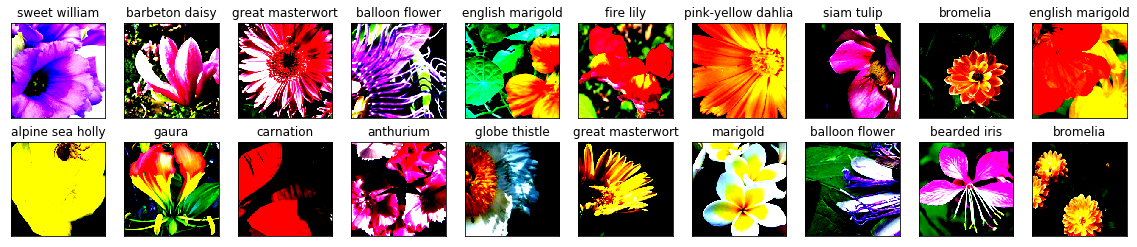

In [29]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,10,idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! You can also ask questions on the forums or join the instructors in office hours.

Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

In [30]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
# print out the model structure
print(vgg16.state_dict)

<bound method VGG.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, c

## Freezing the Features layers 

below we are going to freeze the layers that perform the feature extraction stage


In [31]:
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False


## Creating the specific clasifier 

Now we are going to unplug the vgg16 clasifier part and plug our own.

In [32]:
n_inputs = vgg16.classifier[6].in_features

# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(classes))

vgg16.classifier[6] = last_layer

# if GPU is available, move the model to GPU
if train_on_gpu:
    vgg16.cuda()

# check to see that your last layer produces the expected number of outputs
print(vgg16.classifier[6].out_features)
#print(vgg16)

102


## Specifing the the lost function and optimizer

In [33]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.001)

## Training Loop 

below I will going to define the training loop for the clasification part of our vgg16 network.


In [34]:
n_epochs= 20
valid_loss_min = np.Inf
for current_epoch in range(1, n_epochs):
    train_loss = 0.0
    valid_loss = 0.0

    # alway think that you have a GPU :)
    for batch,(X,Y) in enumerate(train_loader):
        if train_on_gpu:
            X, Y = X.cuda(), Y.cuda()
        
        # Clears the gradients of all optimized
        optimizer.zero_grad()
        # forward pass
        output = vgg16(X)
        # compute the loss
        loss = criterion(output, Y)
        # backward pass
        loss.backward()
        # optimize the weigths
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        
        if batch% 20 == 19: # showing the average loss each 20 batchs
        #if True :
            print('Epoch %d, Batch %d loss : %.16f' %
                 (current_epoch,batch + 1, train_loss / 20))
            
            for X_valid,Y_valid in test_loader:
                output = vgg16(X_valid)
                loss = criterion(output , Y_valid)
                valid_loss += loss.item()
            valid_loss = valid_loss/test_loader.batch_size
            print('Epoch %d, trainig loss %.16f valid loss : %.16f' %
                 (current_epoch,train_loss / 20, valid_loss))
            
            if valid_loss <= valid_loss_min:
                print("saving the model ...")
                torch.save(vgg16.state_dict(), 'image_classifier.pt')
                valid_loss_min = valid_loss
            else:
                print("Not saving the model ...")
            valid_loss = 0.0
            train_loss = 0.0
            

Epoch 1, Batch 20 loss : 4.8892220258712769
Epoch 1, trainig loss 4.8892220258712769 valid loss : 23.7519039273262038
saving the model ...
Epoch 1, Batch 40 loss : 4.6413807630538937
Epoch 1, trainig loss 4.6413807630538937 valid loss : 22.4657930135726929
saving the model ...
Epoch 1, Batch 60 loss : 4.4157694816589359
Epoch 1, trainig loss 4.4157694816589359 valid loss : 21.4888272404670708
saving the model ...
Epoch 1, Batch 80 loss : 4.2572128176689148
Epoch 1, trainig loss 4.2572128176689148 valid loss : 20.8067322969436646
saving the model ...
Epoch 1, Batch 100 loss : 4.2933455586433409
Epoch 1, trainig loss 4.2933455586433409 valid loss : 19.9261525392532342
saving the model ...
Epoch 1, Batch 120 loss : 3.8799210906028749
Epoch 1, trainig loss 3.8799210906028749 valid loss : 19.9370693564414978
Not saving the model ...
Epoch 1, Batch 140 loss : 3.8724444270133973
Epoch 1, trainig loss 3.8724444270133973 valid loss : 19.2131999135017395
saving the model ...
Epoch 1, Batch 160 l

Epoch 6, Batch 80 loss : 2.9648356676101684
Epoch 6, trainig loss 2.9648356676101684 valid loss : 14.4568239778280265
Not saving the model ...
Epoch 6, Batch 100 loss : 2.9713037312030792
Epoch 6, trainig loss 2.9713037312030792 valid loss : 13.3439817607402809
Not saving the model ...
Epoch 6, Batch 120 loss : 2.6458602964878084
Epoch 6, trainig loss 2.6458602964878084 valid loss : 13.7040366947650902
Not saving the model ...
Epoch 6, Batch 140 loss : 2.7001273751258852
Epoch 6, trainig loss 2.7001273751258852 valid loss : 12.9686334073543552
saving the model ...
Epoch 6, Batch 160 loss : 2.9323015809059143
Epoch 6, trainig loss 2.9323015809059143 valid loss : 14.2815224885940548
Not saving the model ...
Epoch 6, Batch 180 loss : 2.8930090188980104
Epoch 6, trainig loss 2.8930090188980104 valid loss : 14.2871664583683007
Not saving the model ...
Epoch 6, Batch 200 loss : 2.7931167125701903
Epoch 6, trainig loss 2.7931167125701903 valid loss : 13.6168204545974731
Not saving the model .

Epoch 11, trainig loss 2.3366308629512789 valid loss : 12.6890039592981339
Not saving the model ...
Epoch 11, Batch 140 loss : 2.5277633368968964
Epoch 11, trainig loss 2.5277633368968964 valid loss : 11.4325853407382958
saving the model ...
Epoch 11, Batch 160 loss : 2.1411285758018495
Epoch 11, trainig loss 2.1411285758018495 valid loss : 11.5601157799363143
Not saving the model ...
Epoch 11, Batch 180 loss : 2.6274209260940551
Epoch 11, trainig loss 2.6274209260940551 valid loss : 12.3901005983352661
Not saving the model ...
Epoch 11, Batch 200 loss : 2.3974767625331879
Epoch 11, trainig loss 2.3974767625331879 valid loss : 12.8843631327152259
Not saving the model ...
Epoch 11, Batch 220 loss : 2.3674859821796419
Epoch 11, trainig loss 2.3674859821796419 valid loss : 12.3431575179100044
Not saving the model ...
Epoch 12, Batch 20 loss : 2.3024440944194793
Epoch 12, trainig loss 2.3024440944194793 valid loss : 12.0387220263481147
Not saving the model ...
Epoch 12, Batch 40 loss : 2.3

Epoch 16, Batch 160 loss : 2.6396301567554472
Epoch 16, trainig loss 2.6396301567554472 valid loss : 11.7560008645057685
Not saving the model ...
Epoch 16, Batch 180 loss : 2.5269287347793581
Epoch 16, trainig loss 2.5269287347793581 valid loss : 12.7556176006793969
Not saving the model ...
Epoch 16, Batch 200 loss : 2.4526917517185209
Epoch 16, trainig loss 2.4526917517185209 valid loss : 12.6301909208297722
Not saving the model ...
Epoch 16, Batch 220 loss : 2.7025930762290953
Epoch 16, trainig loss 2.7025930762290953 valid loss : 12.3500590503215797
Not saving the model ...
Epoch 17, Batch 20 loss : 2.5694138586521147
Epoch 17, trainig loss 2.5694138586521147 valid loss : 11.9750148922204964
Not saving the model ...
Epoch 17, Batch 40 loss : 2.5011388242244719
Epoch 17, trainig loss 2.5011388242244719 valid loss : 11.5889809787273403
Not saving the model ...
Epoch 17, Batch 60 loss : 1.9900717437267303
Epoch 17, trainig loss 1.9900717437267303 valid loss : 11.5426398575305935
Not sa

KeyboardInterrupt: 

In [16]:
test_loader.batch_size

20

##  Running Validation 

Now we are going to run the validation process using the validation data set.

but first lets load the network.

In [35]:
# Load the pretrained model from pytorch
state_dict = torch.load('image_classifier.pt')
vgg16 = models.vgg16(pretrained=True)
n_inputs = vgg16.classifier[6].in_features
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(classes))

vgg16.classifier[6] = last_layer
vgg16.load_state_dict(state_dict)
# print out the model structure
#print(vgg16.state_dict)

In [36]:
# track valid loss 
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

vgg16.eval() # eval mode

# iterate over test data
for data, target in valid_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = vgg16(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(data.size(0)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1



In [37]:
# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.153660

Test Accuracy of red ginger: 12% ( 1/ 8)
Test Accuracy of grape hyacinth: 100% ( 4/ 4)
Test Accuracy of corn poppy: 33% ( 2/ 6)
Test Accuracy of prince of wales feathers: 20% ( 1/ 5)
Test Accuracy of giant white arum lily: 100% ( 6/ 6)
Test Accuracy of fire lily: 50% ( 5/10)
Test Accuracy of pincushion flower: 100% ( 5/ 5)
Test Accuracy of fritillary: 100% ( 5/ 5)
Test Accuracy of stemless gentian: 100% ( 1/ 1)
Test Accuracy of artichoke: 28% ( 2/ 7)
Test Accuracy of sweet pea: 50% ( 1/ 2)
Test Accuracy of bird of paradise: 81% (13/16)
Test Accuracy of orange dahlia: 45% ( 5/11)
Test Accuracy of geranium:  0% ( 0/ 4)
Test Accuracy of pelargonium: 100% ( 6/ 6)
Test Accuracy of sunflower: 42% ( 3/ 7)
Test Accuracy of gaura: 75% ( 3/ 4)
Test Accuracy of bishop of llandaff: 87% ( 7/ 8)
Test Accuracy of petunia: 83% (10/12)
Test Accuracy of common dandelion: 100% ( 5/ 5)
Test Accuracy of primula: 100% ( 2/ 2)
Test Accuracy of wild pansy:  0% ( 0/ 3)
Test Accuracy of cyc

## Visulize Sample Test Results


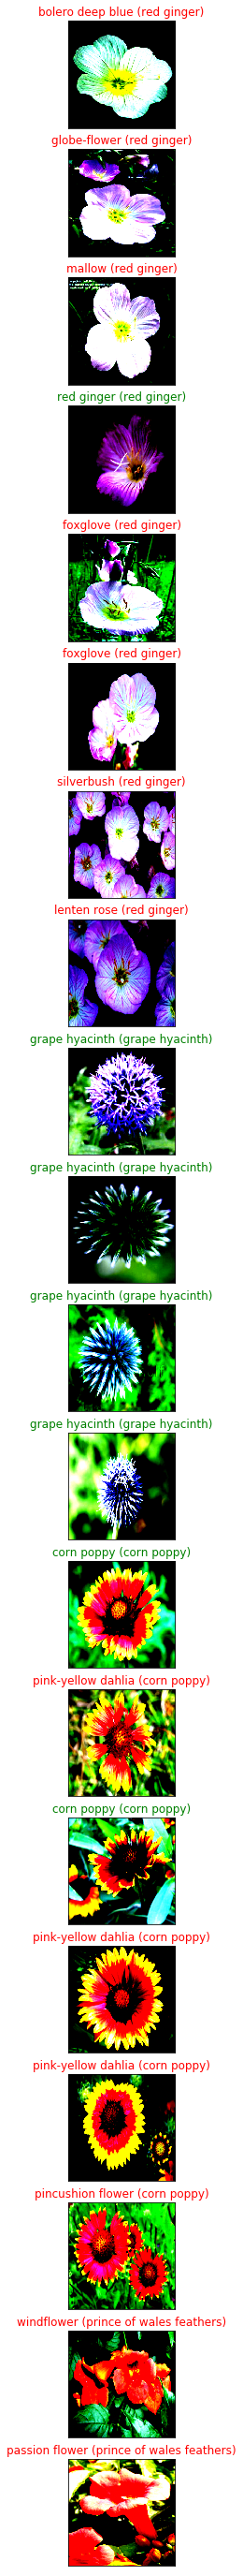

In [38]:
# obtain one batch of test images
dataiter = iter(valid_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = vgg16(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(50, 50))
for idx in np.arange(20):
    ax = fig.add_subplot(20, 1, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [ ]:
# TODO: Save the checkpoint 

## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [ ]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [ ]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [ ]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file

## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the validation accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [ ]:
# TODO: Display an image along with the top 5 classes